# **Data Analysis of Covid 19 Spread in India**

**By**
[Patnaik SG](https://linkedin.com/in/patnaik-sg/)

## **Importing Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## **Importing Data Sets**

In [0]:
data = pd.read_csv("/content/gdrive/My Drive/Data Sets/covid_19_india.csv")
data2 = pd.read_csv("/content/gdrive/My Drive/Data Sets/covid_19_india_timeseries.csv")

In [4]:
data.head()

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Death,Date,Latitude,Longitude,Total cases
0,Andaman and Nicobar Islands,33,33,0,2020-05-29,11.7401,92.6586,33
1,Andhra Pradesh,3251,2125,59,2020-05-29,15.9129,79.7400,3251
2,Arunachal Pradesh,3,1,0,2020-05-29,28.2180,94.7278,3
3,Assam,856,104,4,2020-05-29,26.2006,92.9376,856
4,Bihar,3296,1211,15,2020-05-29,25.0961,85.3131,3296


## **Overview of Datset**

In [5]:
data

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Death,Date,Latitude,Longitude,Total cases
0,Andaman and Nicobar Islands,33,33,0,2020-05-29,11.7401,92.6586,33
1,Andhra Pradesh,3251,2125,59,2020-05-29,15.9129,79.7400,3251
2,Arunachal Pradesh,3,1,0,2020-05-29,28.2180,94.7278,3
3,Assam,856,104,4,2020-05-29,26.2006,92.9376,856
4,Bihar,3296,1211,15,2020-05-29,25.0961,85.3131,3296
5,Chandigarh,288,189,4,2020-05-29,30.7333,76.7794,288
6,Chhattisgarh,399,83,0,2020-05-29,21.2787,81.8661,399
7,Dadar Nagar Haveli,2,0,0,2020-05-29,NaN,NaN,2
8,Delhi,16281,7495,316,2020-05-29,28.7041,77.1025,16281
9,Goa,69,38,0,2020-05-29,15.2993,74.1240,69


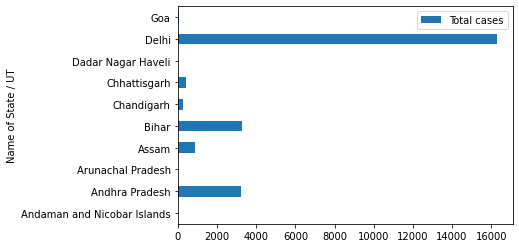

In [6]:
data[0:10].plot.barh(x="Name of State / UT",y="Total cases")

## **Top 10 States with highest number of Confirmed Cases**

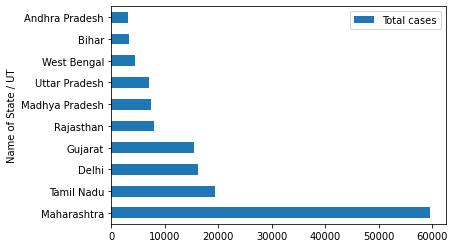

In [7]:
data.sort_values(by=['Total cases'], inplace=True, ascending=False)
data[0:10].plot.barh(x="Name of State / UT",y="Total cases")

## **Representation of Total Cases vs Cured vs Death of each state**

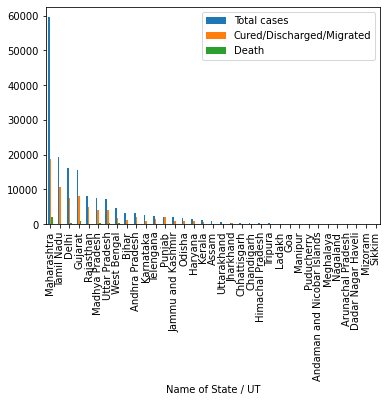

In [8]:
data.plot(x="Name of State / UT", y=["Total cases", "Cured/Discharged/Migrated", "Death"], kind="bar")

## **Overview of Time Series Dataset of Covid 19 Trend in India**

In [9]:
data2.head()

,Date,Total cases,Total Recovered,Total Death,X.1,X.2,X.3,X.4
0,1 Mar,3,NaN,NaN,undefined,undefined,undefined,undefined
1,2 Mar,6,NaN,NaN,undefined,undefined,undefined,undefined
2,3 Mar,8,NaN,NaN,undefined,undefined,undefined,undefined
3,4 Mar,30,NaN,NaN,undefined,undefined,undefined,undefined
4,5 Mar,31,NaN,NaN,undefined,undefined,undefined,undefined


In [10]:
data2.tail()

,Date,Total cases,Total Recovered,Total Death,X.1,X.2,X.3,X.4
86,26 May,151767,64426.0,4337.0,undefined,undefined,undefined,undefined
87,27 May,158333,67692.0,4531.0,undefined,undefined,undefined,undefined
88,28 May,165799,71106.0,4706.0,undefined,undefined,undefined,undefined
89,29 May,173763,82370.0,4971.0,undefined,undefined,undefined,undefined
90,30 May,182143,86984.0,5164.0,undefined,undefined,undefined,undefined


## **Remove unnecessary columns**

In [0]:
data2 = data2.drop(['X.1','X.2','X.3','X.4'],axis=1)

## **Replacing Null values with zeros**

In [29]:
data2.fillna(0)

,Date,Total cases,Total Recovered,Total Death,New
0,1 Mar,3,0.0,0.0,3.0
1,2 Mar,6,0.0,0.0,3.0
2,3 Mar,8,0.0,0.0,2.0
3,4 Mar,30,0.0,0.0,22.0
4,5 Mar,31,0.0,0.0,1.0
...,...,...,...,...,...
86,26 May,151767,64426.0,4337.0,6387.0
87,27 May,158333,67692.0,4531.0,6566.0
88,28 May,165799,71106.0,4706.0,7466.0
89,29 May,173763,82370.0,4971.0,7964.0


### **Spread of Corona Virus in India**


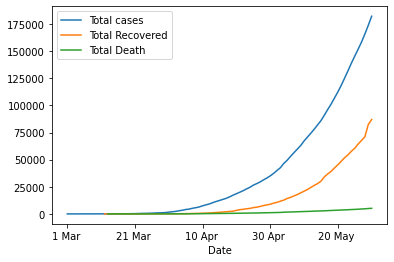

In [13]:
data2.plot(x='Date')

### **Calculating number of New Cases**

In [32]:
data2["New"] = data2["Total cases"] - data2["Total cases"].shift(1)
data2["New"] = data2["New"].fillna(method='bfill')
data2.fillna(0)

,Date,Total cases,Total Recovered,Total Death,New
0,1 Mar,3,0.0,0.0,3.0
1,2 Mar,6,0.0,0.0,3.0
2,3 Mar,8,0.0,0.0,2.0
3,4 Mar,30,0.0,0.0,22.0
4,5 Mar,31,0.0,0.0,1.0
...,...,...,...,...,...
86,26 May,151767,64426.0,4337.0,6387.0
87,27 May,158333,67692.0,4531.0,6566.0
88,28 May,165799,71106.0,4706.0,7466.0
89,29 May,173763,82370.0,4971.0,7964.0


### **Visualization of new cases**

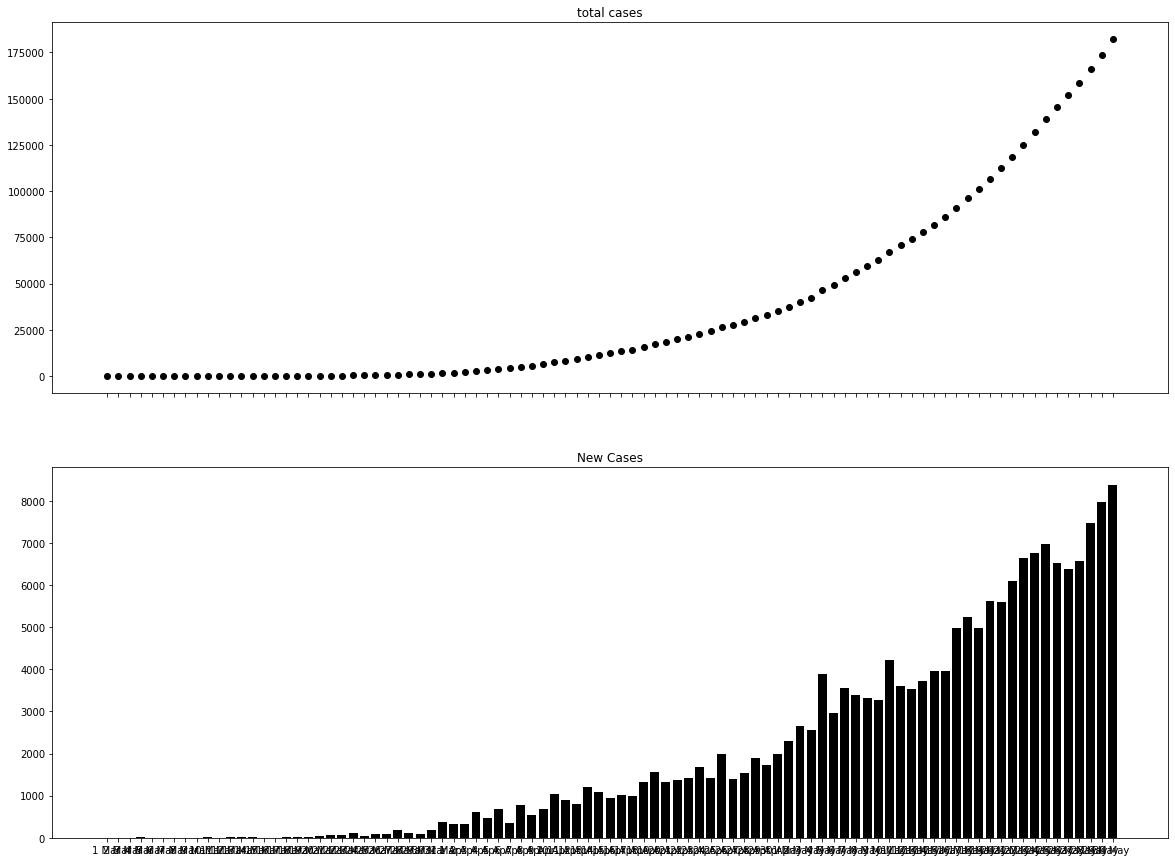

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20,15))
ax[0].scatter(data2["Date"], data2["Total cases"].values, color="black")
ax[0].set(title="total cases")
ax[1].bar(data2["Date"], data2["New"].values, color="black")
ax[1].set(title="New Cases")
plt.show()

### **Linear Function**

In [0]:
def f(x):
    return 10 + 1500*x

y_linear = f(x=np.arange(len(data2)))

### **Exponential Function**

In [0]:
def f(x):
    return 10 + 1.18**x

y_exponential = f(x=np.arange(len(data2)))

### **Logistic Function**

In [0]:
def f(x): 
    return 90000 / (1 + np.exp(-0.5*(x-20)))

y_logistic = f(x=np.arange(len(data2)))

In [49]:
data2.set_index('Date')

,Total cases,Total Recovered,Total Death,New
Date,,,,
1 Mar,3,NaN,NaN,3.0
2 Mar,6,NaN,NaN,3.0
3 Mar,8,NaN,NaN,2.0
4 Mar,30,NaN,NaN,22.0
5 Mar,31,NaN,NaN,1.0
...,...,...,...,...
26 May,151767,64426.0,4337.0,6387.0
27 May,158333,67692.0,4531.0,6566.0
28 May,165799,71106.0,4706.0,7466.0


## **Linear , Exponential and Logistic growth rate of New Cases**

---



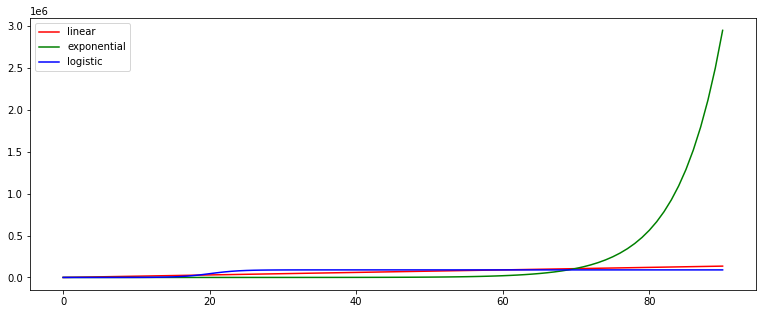

In [53]:
fig, ax = plt.subplots(figsize=(13,5))
#ax.scatter(data2["Total cases"].index, data2["Total cases"].values, color="black")
ax.plot(data2["Total cases"].index, y_linear, label="linear", color="red")
ax.plot(data2["Total cases"].index, y_exponential, label="exponential", color="green")
ax.plot(data2["Total cases"].index, y_logistic, label="logistic", color="blue")
ax.legend()
plt.show()